<p><b><font size = 5 face = 'verdana'>DADOS DE CRÉDITO ALEMÃO - ANÁLISE EXPLORATÓRIA DE DADOS</font></b></p>
<img src = 'https://s3.amazonaws.com/contents.newzenler.com/398/courses/2987/data/thumb/l-bcap14887804814.png'>
<p><font size = 4 face = 'verdana'>Nesse exemplo farei uma análise de dados que é um processo muito importante, cujo objetivo é a análise de dados brutos para extrair informações e tirar insights sobre os dados. A análise de dados é um campo importante na ciência de dados, normalmente temos diversos tipos de ruídos no conjunto de dados. Quando um banco recebe um pedido de empréstimo, o banco tem que tomar uma decisão sobre prosseguir ou não com a aprovação do empréstimo. O banco toma uma decisão sobre o empréstimo com base no perfil do solicitante. Dois tipos de riscos estão associados à decisão do banco:
<li>Se o requerente é um bom risco de crédito, ou seja, é provável que pague o empréstimo, então não aprovar o empréstimo para a pessoa resulta em perda de negócios para o banco.</li> 
<li>Se o solicitante tiver um risco de crédito ruim, ou seja, não for provável que pague o empréstimo, a aprovação do empréstimo para a pessoa resultará em uma perda financeira para o banco.</li></font></p>
<p><font size = 4 face = 'verdana'>O objetivo dos Dados de Crédito Alemães é minimizar as chances de emitir empréstimos arriscados aos solicitantes, maximizando as chances de lucrar com bons empréstimos. Os perfis demográficos e socioeconómicos de um requerente são considerados pelos gestores de crédito antes de ser tomada uma decisão sobre o seu pedido de empréstimo.</font></p>
<p><font size = 4 face = 'verdana'>O conjunto de dados German Credit é um conjunto de dados disponível publicamente baixado do <a href="https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29">UCI Machine Learning Repository.</a> Os dados de crédito alemães contêm dados sobre 20 variáveis ​​e a classificação se um solicitante é considerado um risco de crédito Bom ou Ruim para 1.000 solicitantes de empréstimo. A tarefa exige explorar os dados e construir um modelo preditivo para fornecer orientação ao gerente do banco para tomar uma decisão sobre a aprovação de um empréstimo a um candidato em potencial com base em seu perfil.</font></p>
<p><b><font size = 4 face = 'verdana'>EXPLORATORY DATA ANALYSIS (EDA)</font></b></p>
<p><font size = 4 face = 'verdana'>A Análise Exploratória de Dados (EDA) é usada para fazer um exame completo de um conjunto de dados. A EDA expõe tendências, padrões e relacionamentos dentro do conjunto de dados que podem não ser aparentes. Para este estudo de caso, usei uma versão simplificada do conjunto de dados original que possui apenas 10 variáveis:
<ol type="1">
<li>Age: Idade (numérico)</li> 
<li>Sex: Sexo (string: masculino, feminino)</li> 
<li>Job: Emprego (numérico: 0 – não qualificado e não residente, 1 – não qualificado e residente, 2 – qualificado, 3 – altamente qualificado)</li> 
<li>Housing: Habitação (string: própria, alugada ou gratuita)</li> 
<li>Saving Accounts: Contas de poupança (sequência — pequena, moderada, bastante rica, rica)</li> 
<li>Checking account: Conta corrente (string — pequena, moderada, rica)</li> 
<li>Credit amount: Valor do crédito (numérico, em DM — Deutschmark)</li> 
<li>Duration: Duração (numérico, em meses)</li> 
<li>Purpose: Finalidade (texto: carro, móveis/equipamentos, rádio/TV, eletrodomésticos, reparos, educação, negócios, férias/outros)</li> 
<li>Risk: Risco (string — bom, ruim)</li></ol></font></p>



In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

In [62]:
# Importando os dados, para isso criei a variável credit_df
credit_df = pd.read_csv("german_credit_data.csv", index_col=0)
credit_df = credit_df.copy()
credit_df.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<font size = 4 face = 'verdana'>
<li>O conjunto de dados contém 10 colunas e 1.000 linhas (4 features são int64 e 6 features são tipos de object datatypes)</li>
<li>As colunas "Saving accounts" e "Checking account" são as duas únicas colunas com valores em falta.</li></font>

In [63]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


<font size = 4 face = 'verdana'>
<li>A idade média arredondada é de 36 anos</li> 
<li>A duração média arredondada é de 21</li> 
<li>A faixa etária é de 19 a 75 anos</li> 
<li>A faixa de crédito em Deutschmark (DM) é de 250 a 18424</li></font>

In [64]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


<font size = 4 face = 'verdana'>
<li>Há 183 valores ausentes na coluna <b>Saving accounts</b></li> 
<li>Há 394 valores ausentes na coluna <b>Checking account</b></li> 
Os valores nas colunas <b>Checking</b> e <b>Saving accounts</b> são categóricos, então decidi dar uma olhada mais de perto em quais eram esses valores.

In [65]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [66]:
print("Saving accounts", credit_df['Saving accounts'].unique())
print("Checking accounts", credit_df['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


<font size = 4 face = 'verdana'>Ao descartar as linhas sem valores, o conjunto de dados perderá 577 instâncias, que são mais da metade. Isso é uma perda significativa de dados. Para evitar isso, substituí os valores nulos por nenhum. É possível que os solicitantes com valores nulos não tivessem conta poupança ou corrente no momento da solicitação.</font>

In [67]:
credit_df["Saving accounts"].fillna("none", inplace=True)
credit_df["Checking account"].fillna("none", inplace=True)
credit_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

<p><b><font size = 5 face = 'verdana'>VISUALIZANDO OS DADOS</font></b></p>
<font size = 4 face = 'verdana'>Distribuição da variável <b>TARGET:</b></font><br>
<font size = 4 face = 'verdana'>
<li>Existem 700 casos em que um candidato foi classificado como bom;</li> 
<li>Existem 300 casos em que um candidato foi classificado como ruim.</li></font>

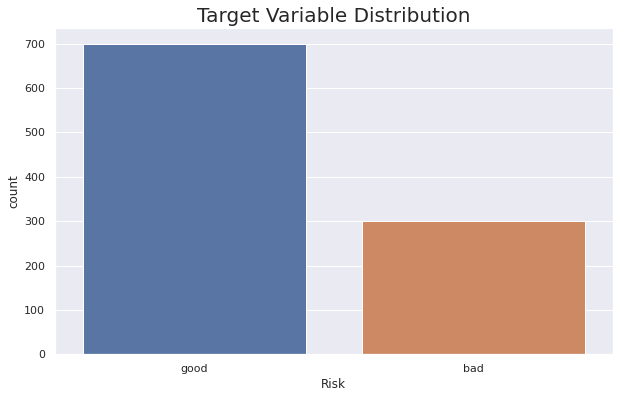

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x="Risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

<p><b><font size = 5 face = 'verdana'>PAIR PLOT DAS VARIÁVEIS NUMÉRICAS</font></b></p>
<font size = 4 face = 'verdana'>Os gráficos de distribuição para AGE, CREDIT AMOUNT e DURATION têm uma inclinação positiva.</font>




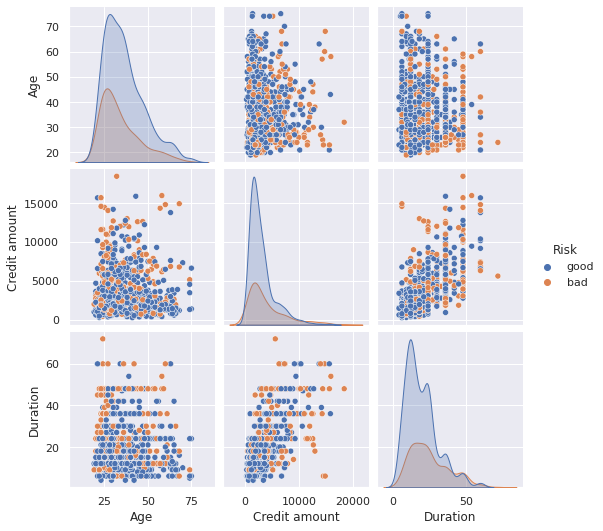

In [69]:
num_cat_risk = ['Age', 'Credit amount', 'Duration', 'Risk']
sns.pairplot(credit_df[num_cat_risk], hue="Risk")
plt.show()

<p><font size = 4 face = 'verdana'>
<li>Todos os gráficos têm uma inclinação positiva indicando que a média é maior que a mediana;</li> 
<li>Candidatos entre 20 e 30 anos são mais propensos a solicitar um empréstimo;</li> 
<li>Os candidatos são menos propensos a solicitar um empréstimo de crédito alto Mais empréstimos foram pagos cerca de 20 meses após serem emitidos;</li> 
<li>É mais provável que o banco receba candidatos com idades entre 20 e 30 anos e solicite empréstimos entre 250 e 2500 DM.</li>

</font></p>

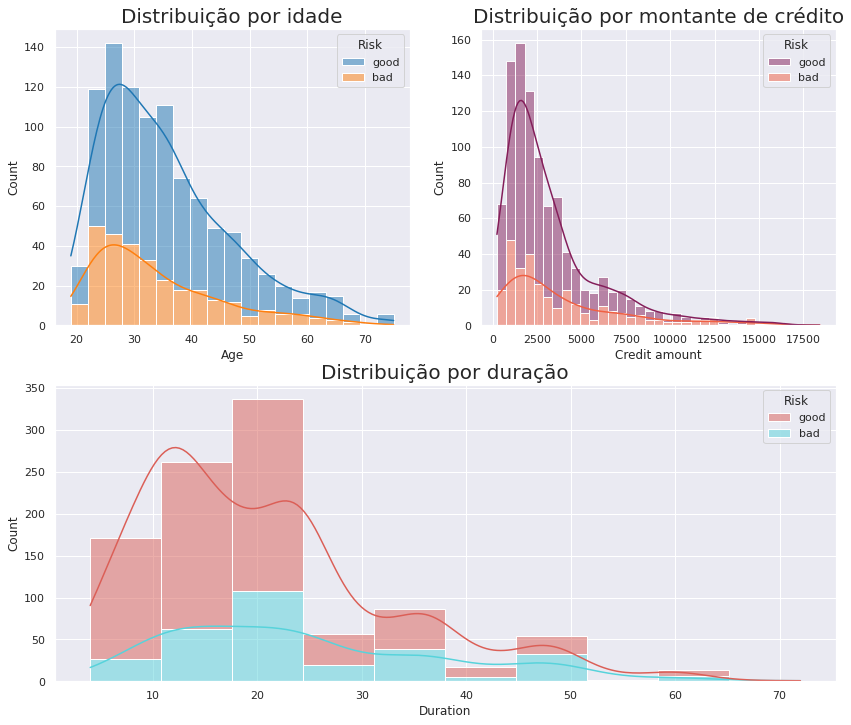

In [70]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=credit_df, x='Age', hue='Risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Distribuição por idade", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=credit_df, x='Credit amount', hue='Risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Distribuição por montante de crédito", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=credit_df, x='Duration', hue='Risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Distribuição por duração", fontsize=20)

plt.show()

<p><font size = 4 face = 'verdana'>
<li>Mais de 50% dos solicitantes com valores de crédito abaixo de 5.000 DM são classificados como bons;</li> 
<li>Adultos com crédito de empréstimo superior a 5.000 DM são mais propensos a classificar como ruim;</li> 
<li>Estudantes e jovens candidatos são mais propensos a solicitar empréstimos com um valor de crédito inferior a 5.000 DM</li>
</font></p>

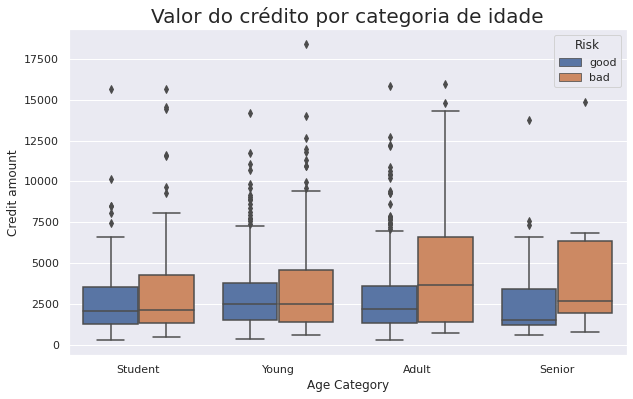

In [71]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
credit_df["Age Category"] = pd.cut(credit_df.Age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Valor do crédito por categoria de idade", fontsize=20)
sns.boxplot(data=credit_df, x='Age Category', y='Credit amount', hue='Risk')
plt.show()

<p><b><font size = 5 face = 'verdana'>DISTRIBUIÇÃO POR HABITAÇÃO</li></b></font></p>


<p><font size = 4 face = 'verdana'>
<li>A maioria dos candidatos possui uma casa;</li> 
<li>Mais de metade dos requerentes que possuem uma casa classificada como boa.</li></font></p>



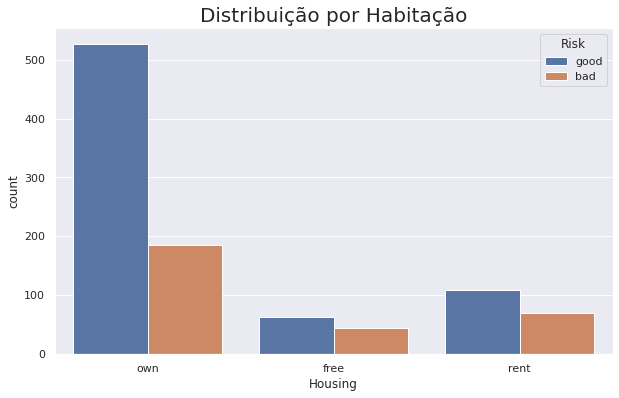

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x='Housing', hue='Risk')
plt.title("Distribuição por Habitação", fontsize=20)
plt.show()

<p><font size = 4 face = 'verdana'>As curvas de densidade do gráfico de violino sugerem que há uma maior frequência de solicitantes com valores de crédito abaixo de 5.000 DM</font></p>



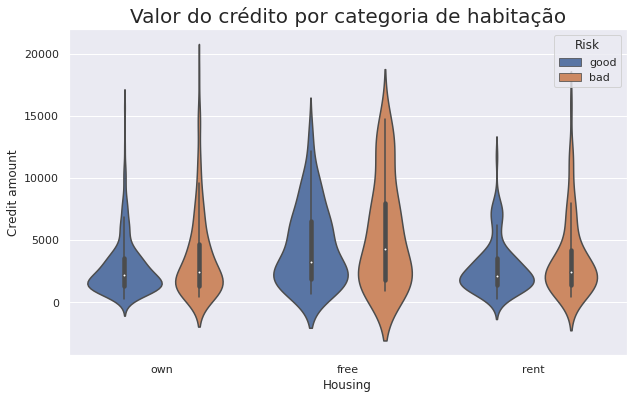

In [73]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=credit_df, x='Housing', y='Credit amount', hue='Risk')
plt.title("Valor do crédito por categoria de habitação", fontsize=20)
plt.show()

<p><b><font size = 5 face = 'verdana'>DISTRIBUIÇÃO POR GÊNERO</li></b></font></p>

<p><font size = 4 face = 'verdana'>
<li>Há 2x mais candidatos do sexo masculino do que do sexo feminino nos dados;</li> 
<li>A maioria dos candidatos está na categoria de trabalho qualificado;</li> 
<li>Cerca de 2/5 dos candidatos do sexo masculino e 1/3 das candidatas do sexo feminino são classificados como ruins 
A distribuição de densidade dos gráficos de violino segue a mesma tendência, sugerindo que a maioria dos candidatos do sexo masculino e feminino são categorizados como trabalhadores qualificados.</li></font></p>

Text(0.5, 1.0, 'Job Category by Gender')

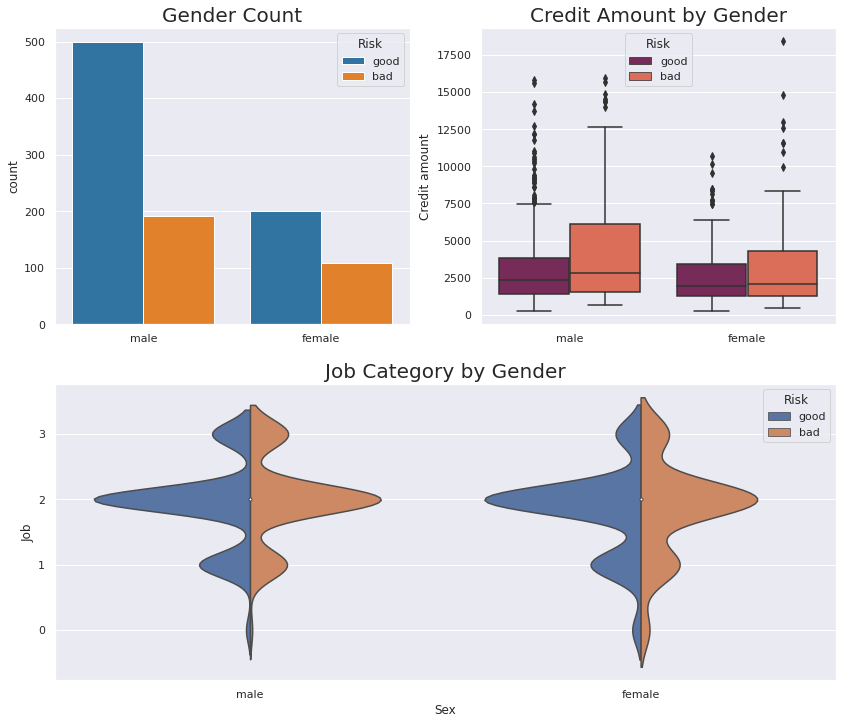

In [74]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x='Sex', hue='Risk', palette='tab10')
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_df, x='Sex', y='Credit amount', palette='rocket', hue='Risk')
ax2.set_title("Credit Amount by Gender", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.violinplot(data=credit_df, x='Sex', y='Job', hue='Risk', split=True)
ax3.set_title("Job Category by Gender", fontsize=20)

<p><b><font size = 5 face = 'verdana'>DISTRIBUIÇÃO POR CATEGORIA DE TRABALHO</li></b></font></p>

<p><font size = 4 face = 'verdana'></font>
<li>Há 2x mais candidatos com empregos qualificados classificados como bons;</li> 
<li>Mais de 50% dos candidatos estão nas categorias de trabalho qualificados e não qualificados e residentes;</li> 
<li>Os candidatos altamente qualificados são mais propensos a fazer empréstimos maiores.</li></p>



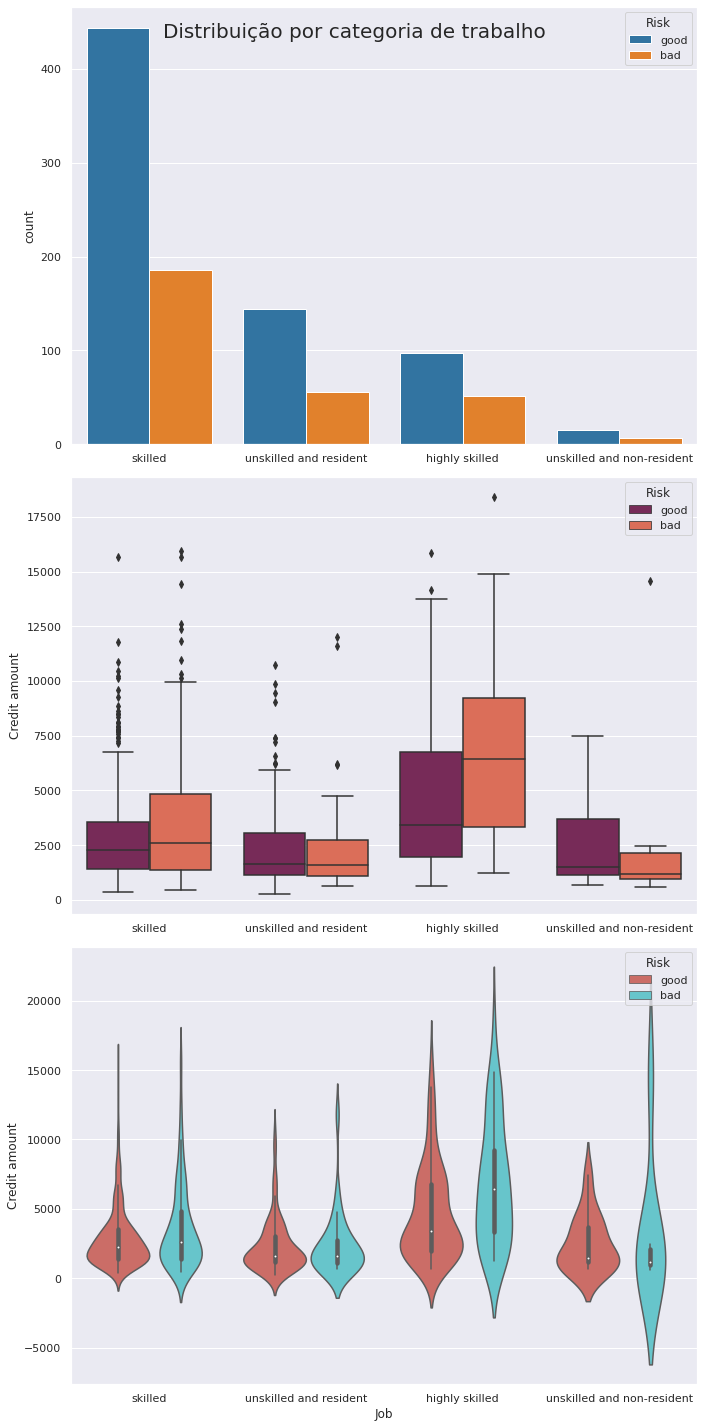

In [75]:
job_category = ['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'] # createing categorial values
credit_df['Job'] = credit_df['Job'].replace([0, 1, 2, 3], job_category) # replacing numerical with categorical values

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Distribuição por categoria de trabalho", fontsize=20)
sns.countplot(data=credit_df, x='Job', hue='Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.boxplot(data=credit_df, x='Job', y='Credit amount', palette='rocket', hue='Risk', ax=ax2)
ax2.set_xlabel("")

sns.violinplot(data=credit_df, x='Job', y='Credit amount', palette='hls', hue='Risk', ax=ax3)
fig.tight_layout()

<p><b><font size = 5 face = 'verdana'></li>DISTRIBUIÇÃO POR CONTAS CORRENTES E POUPANÇA</b></font></p>

<p><font size = 4 face = 'verdana'></font>
<li>Candidatos com pouca ou nenhuma poupança são mais propensos a solicitar empréstimos;</li> 
<li>A maioria dos candidatos está na categoria pequena 50% dos candidatos na categoria pequena estão na faixa etária de 25 a 45 anos;</li> 
<li>Os candidatos com contas de poupança moderadas, bastante ricas e ricas são mais propensos a serem classificados como bons;</li>
<li>Candidatos com pouca e nenhuma conta poupança com um empréstimo de valor de crédito superior a 5.000 DM são mais propensos a classificar como ruim.</li></p>

   

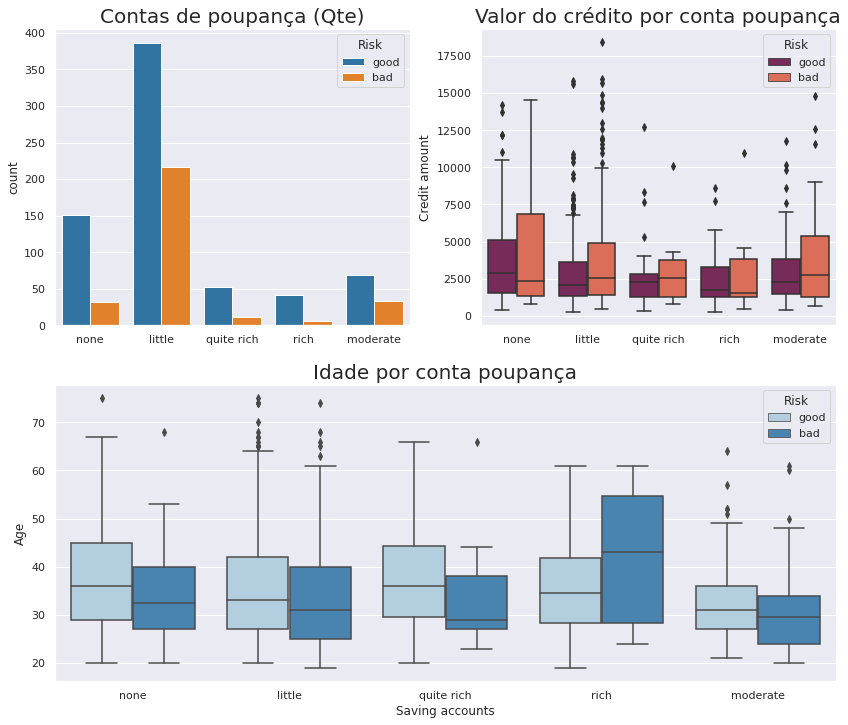

In [88]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x='Saving accounts', hue='Risk', palette='tab10')
ax1.set_title("Contas de poupança (Qte)", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_df, x='Saving accounts', y='Credit amount', hue='Risk', palette='rocket')
ax2.set_title("Valor do crédito por conta poupança", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=credit_df, x='Saving accounts', y='Age', hue='Risk', palette='Blues')
ax3.set_title("Idade por conta poupança", fontsize=20)

plt.show()

<p><font size = 4 face = 'verdana'></font>
<li>Mais de 300 mil candidatos não tinham conta corrente;</li> 
<li>Mais de 3x os solicitantes que não possuíam conta corrente foram classificados como bons;</li> 
<li>50% dos solicitantes que tinham contas correntes moderadas estavam na faixa etária de 25 a 40 anos;</li> 
<li>Há uma dispersão maior de solicitantes com contas correntes ricas que são classificadas como boas e têm idade entre 25 e 45 anos;</li> 
<li>Candidatos com alto valor de crédito e pouco em suas contas correntes são mais propensos a classificar como ruim.</li>
</p>





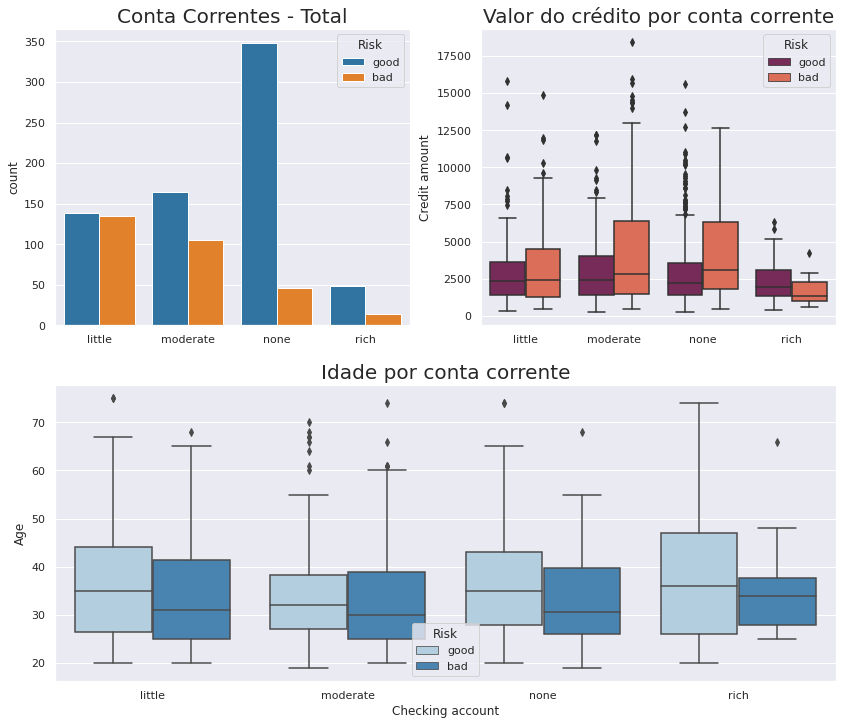

In [86]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x='Checking account', hue='Risk', palette='tab10')
ax1.set_title("Conta Correntes - Total", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_df, x='Checking account', y='Credit amount', hue='Risk', palette='rocket')
ax2.set_title("Valor do crédito por conta corrente", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=credit_df, x='Checking account', y='Age', hue='Risk', palette='Blues')
ax3.set_title("Idade por conta corrente", fontsize=20)

plt.show()

<p><b><font size = 5 face = 'verdana'></li>DISTRIBUIÇÃO POR PRÓPOSITO DE EMPRÉSTIMO</b></font></p>

<p><font size = 4 face = 'verdana'></font>
<li>Grande parte dos solicitantes solicitou empréstimos para compra de carros, rádios/tv’s;</li> 
<li>Mais de metade dos requerentes solicitaram empréstimos inferiores a 5.000 DM;</li> 
<li>Candidatos com empréstimos de crédito altos são mais propensos a classificar como ruins.</li> 
</p>

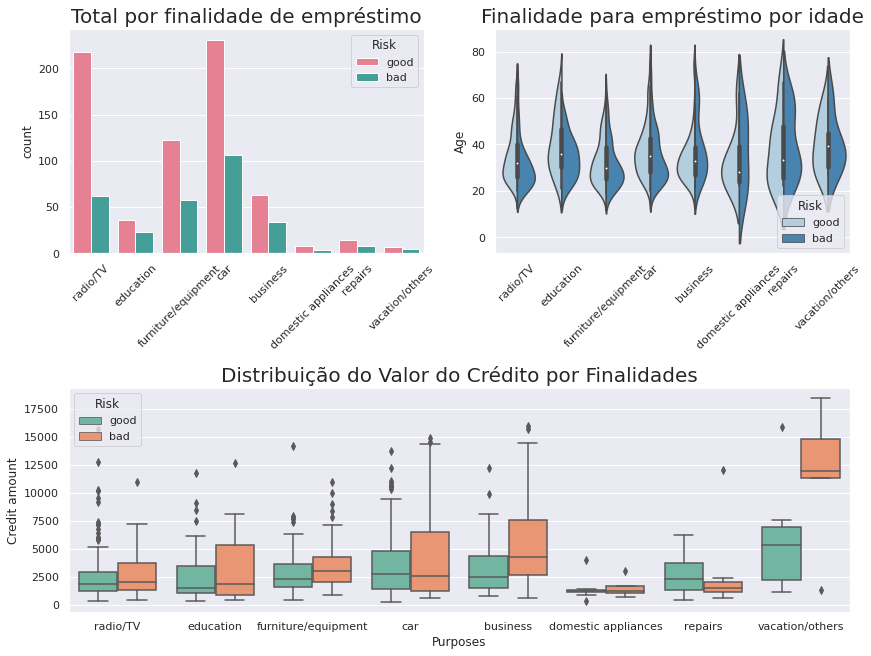

In [83]:
plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x="Purpose", palette="husl", hue = "Risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("")
ax1.set_title("Total por finalidade de empréstimo", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=credit_df, x="Purpose", y="Age", palette="Blues", hue = "Risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_xlabel("")
ax2.set_title("Finalidade para empréstimo por idade", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=credit_df, x="Purpose", y="Credit amount", palette="Set2", hue = "Risk")
ax3.set_xlabel("Purposes")
ax3.set_title("Distribuição do Valor do Crédito por Finalidades", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

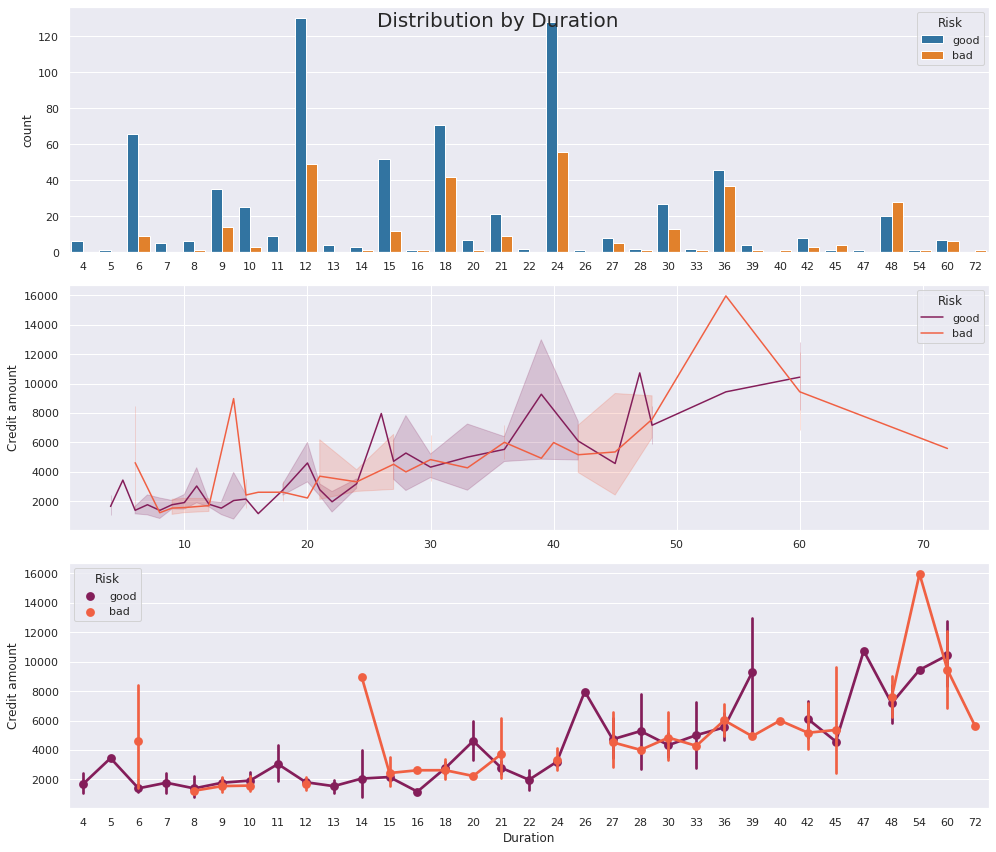

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Distribution by Duration", fontsize=20)
sns.countplot(data=credit_df, x='Duration', hue='Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.lineplot(data=credit_df, x='Duration', y='Credit amount', hue='Risk', palette='rocket', ax=ax2)
ax2.set_xlabel("")

sns.pointplot(data=credit_df, x='Duration', y='Credit amount', hue='Risk', palette='rocket', ax=ax3)
fig.tight_layout()
plt.show()

<p><b><font size = 4 face = 'verdana'>CONCLUSÕES DA ANÁLISE DE CRÉDITO</p></b></font>
<p><font size = 4 face = 'verdana'>
<li>Empréstimos com prazos inferiores a 24 meses são mais propensos a serem reembolsados;</li>
<li>É mais seguro emitir empréstimos com um montante de crédito inferior a 5.000 DM e um prazo de duração inferior a 24 meses</li>
<li>Os candidatos que possuem propriedades mostram que são financeiramente independentes e são melhores candidatos para um empréstimo;</li>
<li>Candidatos com empregos qualificados e altamente qualificados são candidatos mais seguros para a emissão de empréstimos;</li>
<li>Os empréstimos para automóveis são os empréstimos mais comuns com uma alta taxa de ganhos e perdas emitidos pelo banco (empréstimo mais rentável);</li>
<li>É mais lucrativo emitir empréstimos inferiores a 2.500 DM do que empréstimos de maior valor que têm menos probabilidade de serem reembolsados.</li><br>
O gerente do banco pode tomar uma decisão informativa sobre se deve avançar com o requerente do empréstimo apenas usando as informações acima. A construção de um modelo de previsão usando o conjunto de dados ajudará a aumentar as chances de emitir bons empréstimos (ganho financeiro) enquanto minimiza os maus empréstimos (perda financeira). 
</font></p>